# K Means Clustering

The $K$-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the **cluster “centroids”**; note that they are not, in general, points from $X$, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)$$

## How the algorithm works

The Κ-means clustering algorithm uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters $Κ$ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the $Κ$ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

**Data assigment step**: Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, based on the squared Euclidean distance. More formally, if $c_i$ is the collection of centroids in set $C$, then each data point $x$ is assigned to a cluster based on

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$
where dist( · ) is the standard ($L_2$) Euclidean distance. Let the set of data point assignments for each ith cluster centroid be $S_i$.

**Centroid update step**: In this step, the centroids are recomputed. This is done by taking the mean of all data points assigned to that centroid's cluster.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}$$

The algorithm iterates between steps one and two until a stopping criteria is met (i.e., no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

** Convergence and random initialization **

This algorithm is guaranteed to converge to a result. The result may be a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

<img src=https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif style="width: 500px;"/>

## The Data

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public. We will use a data frame with 777 observations on the following 18 variables.

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [36]:
df = pd.read_csv('College_Data',index_col=0)

**Check the head of the data**

In [38]:
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


** Check the info() and describe() methods on the data.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [39]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Exploratory Analysis

** Create a scatterplot of Grad.Rate versus Room.Board (and their linear fit) where the points are colored by the Private column. **

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


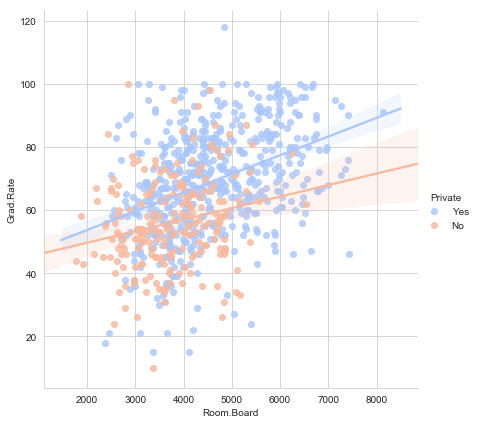

In [40]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=True)

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

**The plot shows that these two feature dimensions separate out based on the type of college**

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


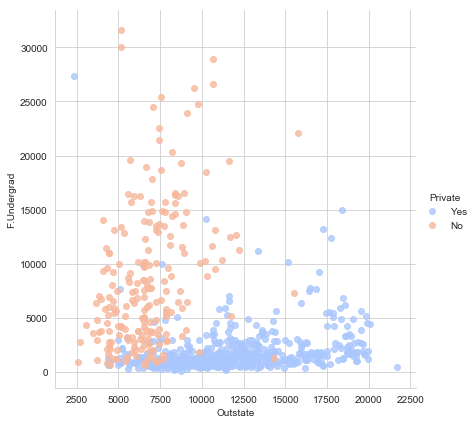

In [41]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

** Create a boxplot of student-faculty ratio based on college type**

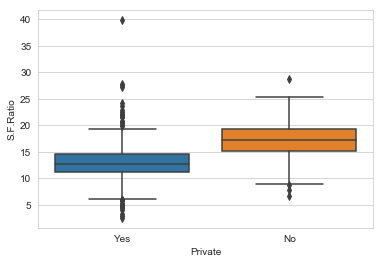

In [42]:
sns.boxplot(x='Private',y='S.F.Ratio',data=df);

** Create a boxplot of percent of alumni who donate based on college type**

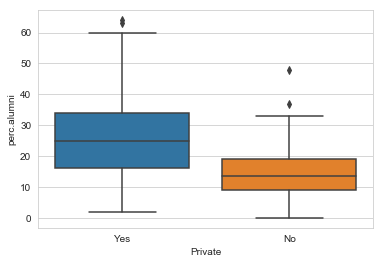

In [43]:
sns.boxplot(x='Private',y='perc.alumni',data=df);

** Create a stacked histogram showing Out of State Tuition based on the Private column.**

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


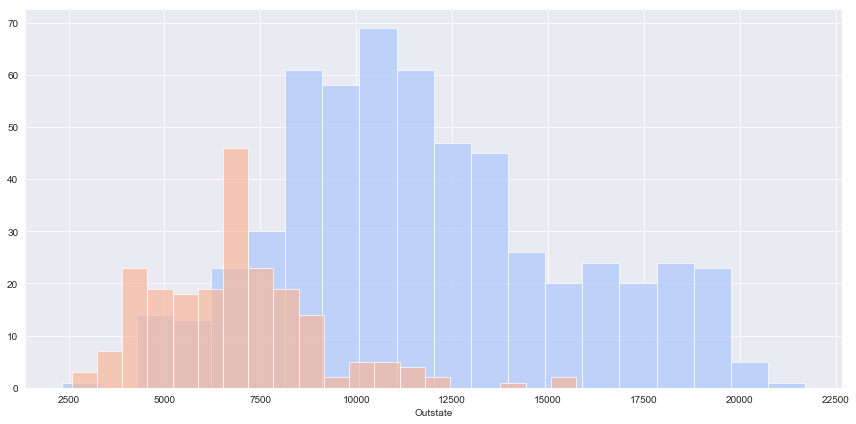

In [44]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7);

**Create a similar histogram for the Grad.Rate column.**

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


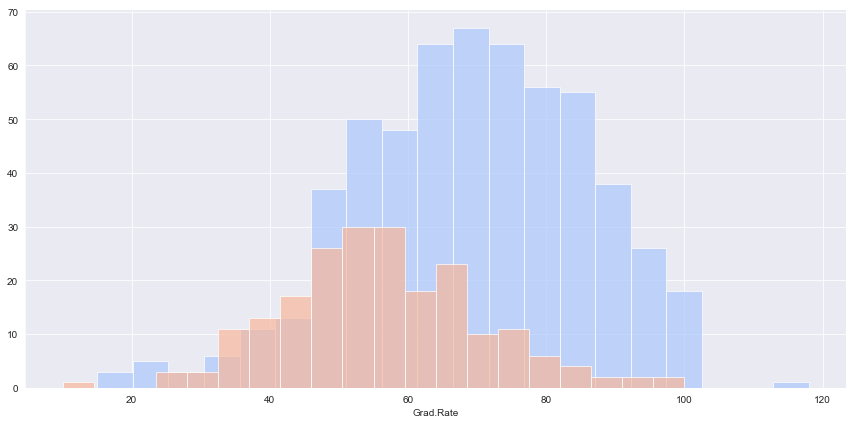

In [45]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7);

**There seems to be a private school with a graduation rate of higher than 100%**

In [15]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [16]:
df['Grad.Rate']['Cazenovia College'] = 100

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


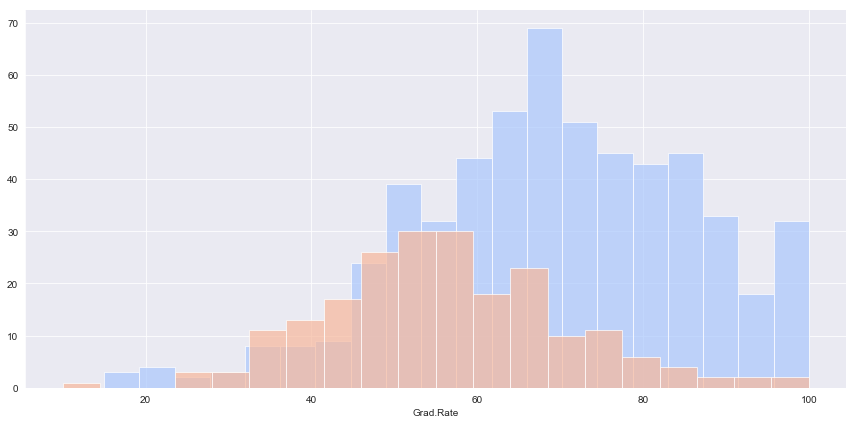

In [18]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

## K Means Cluster Creation

** Import KMeans from SciKit Learn.**

In [19]:
from sklearn.cluster import KMeans

** Create an instance of a K Means model with 2 clusters.**

In [20]:
kmeans = KMeans(n_clusters=2,verbose=0,tol=1e-3,max_iter=300,n_init=20)

**Fit the model to all the data except for the Private label.**

In [21]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.001, verbose=0)

** What are the cluster center vectors?**

In [22]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

**Now compare these cluster centers (for all dimensions/features) to the known means of labeled data**

In [23]:
df[df['Private']=='Yes'].describe() # Statistics for private colleges only

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1977.929204,1305.702655,456.945133,29.330973,56.957522,1872.168142,433.966372,11801.693805,4586.143363,547.506195,1214.440708,71.093805,78.534513,12.945487,25.890265,10486.353982,68.966372
std,2443.341319,1369.549478,457.529136,17.851391,19.588360,2110.661773,722.370487,3707.470822,1089.697557,174.932303,632.879647,17.350886,15.450251,3.518573,12.400755,5682.576587,16.673032
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,2370.000000,250.000000,250.000000,8.000000,24.000000,2.500000,2.000000,3186.000000,15.000000
25%,619.000000,501.000000,206.000000,17.000000,42.000000,840.000000,63.000000,9100.000000,3736.000000,450.000000,800.000000,60.000000,68.000000,11.100000,16.000000,7477.000000,58.000000
50%,1133.000000,859.000000,328.000000,25.000000,55.000000,1274.000000,207.000000,11200.000000,4400.000000,500.000000,1100.000000,73.000000,81.000000,12.700000,25.000000,8954.000000,69.000000
75%,2186.000000,1580.000000,520.000000,36.000000,70.000000,2018.000000,541.000000,13970.000000,5400.000000,600.000000,1500.000000,85.000000,92.000000,14.500000,34.000000,11625.000000,81.000000
max,20192.000000,13007.000000,4615.000000,96.000000,100.000000,27378.000000,10221.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


In [47]:
df[df['Private']=='No'].describe() # Statistics for public colleges only

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,5729.919811,3919.287736,1640.872642,22.834906,52.702830,8571.004717,1978.188679,6813.410377,3748.240566,554.377358,1676.981132,76.834906,82.816038,17.139151,14.358491,7458.316038,56.042453
std,5370.675335,3477.266276,1261.592009,16.180443,20.091058,6467.696087,2321.034696,2145.248389,858.139928,135.729935,677.515680,12.317525,12.069669,3.418049,7.518935,2695.541611,14.583412
min,233.000000,233.000000,153.000000,1.000000,12.000000,633.000000,9.000000,2580.000000,1780.000000,96.000000,400.000000,33.000000,33.000000,6.700000,0.000000,3605.000000,10.000000
25%,2190.750000,1563.250000,701.750000,12.000000,37.000000,3601.000000,600.000000,5366.000000,3121.500000,500.000000,1200.000000,71.000000,76.000000,15.100000,9.000000,5715.000000,46.000000
50%,4307.000000,2929.500000,1337.500000,19.000000,51.000000,6785.500000,1375.000000,6609.000000,3708.000000,550.000000,1649.000000,78.500000,86.000000,17.250000,13.500000,6716.500000,55.000000
75%,7722.500000,5264.000000,2243.750000,27.500000,65.000000,12507.000000,2495.250000,7844.000000,4362.000000,612.000000,2051.250000,86.000000,92.000000,19.325000,19.000000,8570.250000,65.000000
max,48094.000000,26330.000000,6392.000000,95.000000,100.000000,31643.000000,21836.000000,15732.000000,6540.000000,1125.000000,4288.000000,103.000000,100.000000,28.800000,48.000000,16527.000000,100.000000


**Create a data frame with cluster centers and with column names borrowed from the original data frame**

**Is it clear from this data frame which label corresponds to private college (0 or 1)?**

In [48]:
df_desc=pd.DataFrame(df.describe())
feat = list(df_desc.columns)
kmclus = pd.DataFrame(clus_cent,columns=feat)
kmclus

ValueError: Shape of passed values is (2, 18), indices imply (2, 17)

**What are the cluster labels?**

In [49]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

** Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [50]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [28]:
df1=df # Create a copy of data frame so that original data frame does not get 'corrupted' with the cluster index
df1['Cluster'] = df['Private'].apply(converter)

In [51]:
df1

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df1['Cluster'],kmeans.labels_))
print(classification_report(df1['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

   micro avg       0.22      0.22      0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



## Clustering performance (e.g. distance between centroids)

**Create two data frames consisting of only private or public university data**

In [53]:
df_pvt=df[df['Private']=='Yes']
df_pub=df[df['Private']=='No']

In [54]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Play with parameters such as max_iter and n_init and calculate cluster centroid distances**

In [55]:
kmeans = KMeans(n_clusters=2,verbose=0,tol=1e-3,max_iter=50,n_init=10)
kmeans.fit(df.drop('Private',axis=1))
clus_cent = kmeans.cluster_centers_
df_desc = pd.DataFrame(df.describe())
feat = list(df_desc.columns)
kmclus = pd.DataFrame(clus_cent,columns=feat)
a = np.array(kmclus.diff().iloc[1])
centroid_diff = pd.DataFrame(a,columns=['K-means cluster centroid-distance'],index=df_desc.columns)
centroid_diff['Mean of corresponding entity (private)']=np.array(df_pvt.mean())
centroid_diff['Mean of corresponding entity (public)']=np.array(df_pub.mean())
centroid_diff

,K-means cluster centroid-distance,Mean of corresponding entity (private),Mean of corresponding entity (public)
Apps,8549.904210,1977.929204,5729.919811
Accept,5263.732229,1305.702655,3919.287736
Enroll,2078.677379,456.945133,1640.872642
Top10perc,16.181324,29.330973,22.834906
Top25perc,16.732852,56.957522,52.702830
F.Undergrad,10873.386605,1872.168142,8571.004717
P.Undergrad,1869.402217,433.966372,1978.188679
Outstate,323.467406,11801.693805,6813.410377
Room.Board,332.107499,4586.143363,3748.240566
Books,53.230900,547.506195,554.377358
